In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


In [9]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.5226 - acc: 0.8371 - val_loss: 0.1692 - val_acc: 0.9491
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2413 - acc: 0.9301 - val_loss: 0.1246 - val_acc: 0.9623
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1930 - acc: 0.9432 - val_loss: 0.1055 - val_acc: 0.9685
Epoch 4/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1654 - acc: 0.9515 - val_loss: 0.0965 - val_acc: 0.9714
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1457 - acc: 0.9565 - val_loss: 0.0926 - val_acc: 0.9727
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1327 - acc: 0.9618 - val_loss: 0.0798 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1250 - acc: 0.9630 - val_loss: 0.0808 - val_acc

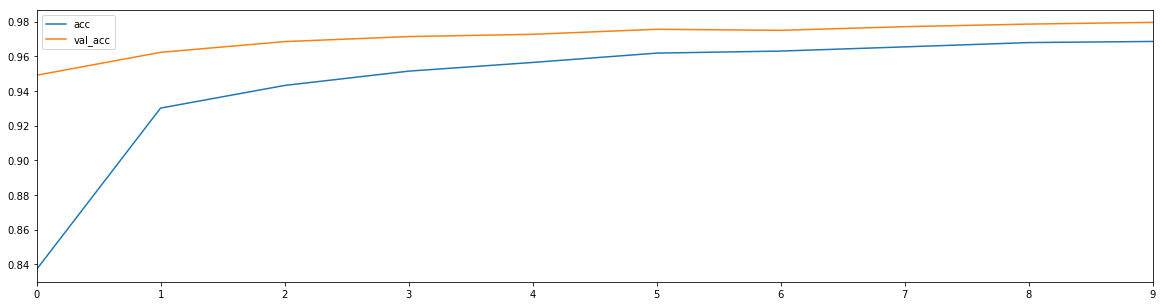

[0.073946045593731108, 0.97960000000000003]

In [13]:
h = pd.DataFrame([history.history['acc'], history.history['val_acc']])
h = h.T
h.columns=['acc', 'val_acc']
h.plot(figsize=(20, 5))
plt.show()
model.evaluate(x_test, y_test, verbose=0)

In [58]:
# Now, a convolutional network
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

In [87]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [97]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, 
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_18/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [95]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [96]:

model.fit(x_train, y_train,
          batch_size=10,
          epochs=32,
          verbose=1,
validation_data=(x_test, y_test))

ValueError: Error when checking input: expected dense_7_input to have 2 dimensions, but got array with shape (60000, 28, 28)